In [1]:
# For searching and accessing NASA data
import earthaccess
from cryo2ice_utils import download_files


# For plotting
# import hvplot.xarray

import pprint  # For nice printing of python objects

user_email = 'andrew.barrett@colorado.edu'

print(earthaccess.__version__)

0.10.0


## Download CryoSat-2 Files

The CryoSat-2 files are stored on an ftp server.  ESA provides a download script to download files returned by a spatiotemporal search.  We have put the script in a separate file `cryo2ice_utils.py` to keep the notebook clean.  

Here we will download a subset of files returned by search.

In [2]:
# %run -i SIR_SAR_L2_E_download_script.py

In [3]:
# !mv CS_LTA__SIR*.nc data

In [4]:
esa_files = [
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T035333_20220118T035805_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220128T133919_20220128T134443_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220119T030002_20220119T030653_E001.nc', 
    'SIR_SAR_L2/2022/02/CS_OFFL_SIR_SAR_2__20220202T124520_20220202T125222_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T053036_20220118T054012_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220118T021149_20220118T021807_E001.nc', 
    'SIR_SAR_L2/2022/01/CS_OFFL_SIR_SAR_2__20220123T111540_20220123T112122_E001.nc', 
    'SIR_SIN_L2/2022/02/CS_OFFL_SIR_SIN_2__20220204T025158_20220204T025637_E001.nc',
]

In [5]:
downloaded_files = download_files(user_email, esa_files, dir="data")

About to connect to ESA science server
1/9. Downloading file CS_OFFL_SIR_SAR_2__20220118T035333_20220118T035805_E001.nc
  [============================================================] 100 % 

2/9. Downloading file CS_OFFL_SIR_SAR_2__20220116T135100_20220116T135639_E001.nc
  [============================================================] 100 % 

3/9. Downloading file CS_OFFL_SIR_SAR_2__20220128T133919_20220128T134443_E001.nc
  [============================================================] 100 % 

4/9. Downloading file CS_OFFL_SIR_SAR_2__20220119T030002_20220119T030653_E001.nc
  [============================================================] 100 % 

5/9. Downloading file CS_OFFL_SIR_SAR_2__20220202T124520_20220202T125222_E001.nc
  [============================================================] 100 % 

6/9. Downloading file CS_OFFL_SIR_SAR_2__20220118T053036_20220118T054012_E001.nc
  [============================================================] 100 % 

7/9. Downloading file CS_OFFL_SIR_SAR

## Get ICESat-2 files

In [6]:
auth = earthaccess.login()

results = earthaccess.search_data(
    short_name = 'ATL10',
    version = '006',
    cloud_hosted = True,
    bounding_box = (-17, 79, 12, 83),
    temporal = ('2019-10-01','2020-04-30'),
    count = 4
)

print(len(results))

4


In [7]:
icesat2_files = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

## Plot data

In [8]:
# For loading data
import xarray as xr

# For plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

First, let's open a file and take a look at the contents.  We'll use `xarray` to do this.

In [9]:
ds = xr.open_dataset(downloaded_files[0])
ds

<xarray.Dataset> Size: 1MB
Dimensions:                           (time_cor_01: 303, time_20_ku: 6042)
Coordinates:
    lat_01                            (time_cor_01) float64 2kB ...
    lat_poca_20_ku                    (time_20_ku) float64 48kB ...
    lon_01                            (time_cor_01) float64 2kB ...
    lon_poca_20_ku                    (time_20_ku) float64 48kB ...
  * time_20_ku                        (time_20_ku) datetime64[ns] 48kB 2022-0...
  * time_cor_01                       (time_cor_01) datetime64[ns] 2kB 2022-0...
Data variables: (12/54)
    alt_01                            (time_cor_01) float64 2kB ...
    echo_avg_numval_20_ku             (time_20_ku) float32 24kB ...
    flag_cor_applied_20_ku            (time_20_ku) float64 48kB ...
    flag_cor_err_01                   (time_cor_01) float64 2kB ...
    flag_instr_conf_rx_str_in_use_01  (time_cor_01) float32 1kB ...
    flag_instr_mode_op_20_ku          (time_20_ku) float32 24kB ...
    ...                                ...
    ssha_interp_20_ku                 (time_20_ku) float64 48kB ...
    ssha_interp_numval_20_ku          (time_20_ku) float32 24kB ...
    ssha_interp_rms_20_ku             (time_20_ku) float64 48kB ...
    surf_type_20_ku                   (time_20_ku) float32 24kB ...
    swh_ocean_01_ku                   (time_cor_01) float64 2kB ...
    wind_speed_alt_01_ku              (time_cor_01) float64 2kB ...
Attributes: (12/101)
    product_name:                 CS_OFFL_SIR_SAR_2__20220118T035333_20220118...
    processing_stage:             OFFL
    reference_document:           CS-RS-ACS-ESL-5265 2.1
    doi:                          10.5270/CR2-53hztdl
    acquisition_station:          Kiruna              
    mission:                      Cryosat
    ...                           ...
    xref_surf_type:               CS_OPER_AUX_LS_MAP_00000000T000000_99999999...
    xref_tidal_load:              CS_OPER_AUX_TDLOAD_00000000T000000_99999999...
    xref_u_wind:                  CS_OPER_AUX_U_WIND_20220118T000000_20220118...
    xref_uso:                     CS_OPER_AUX_DORUSO_20100411T040029_20220214...
    xref_v_wind:                  CS_OPER_AUX_V_WIND_20220118T000000_20220118...
    xref_wet_trop:                CS_OPER_AUX_WETTRP_20220118T000000_20220118...

In [10]:
icesat2_files[0]
ds = xr.open_dataset(icesat2_files[3], group='gt2r/freeboard_segment')
ds

<xarray.Dataset> Size: 992kB
Dimensions:               (delta_time: 16258)
Coordinates:
  * delta_time            (delta_time) datetime64[ns] 130kB 2019-10-02T11:20:...
    latitude              (delta_time) float64 130kB ...
    longitude             (delta_time) float64 130kB ...
Data variables:
    beam_fb_confidence    (delta_time) float32 65kB ...
    beam_fb_height        (delta_time) float32 65kB ...
    beam_fb_quality_flag  (delta_time) int8 16kB ...
    beam_fb_unc           (delta_time) float32 65kB ...
    beam_refsurf_ndx      (delta_time) int32 65kB ...
    geoseg_beg            (delta_time) int32 65kB ...
    geoseg_end            (delta_time) int32 65kB ...
    height_segment_id     (delta_time) int32 65kB ...
    seg_dist_x            (delta_time) float64 130kB ...
Attributes:
    Description:  Contains freeboard estimate and associated parameters compu...
    data_rate:    Data within this group are stored at the variable individua...

CPU times: user 23.3 s, sys: 3.04 s, total: 26.4 s
Wall time: 1min 7s


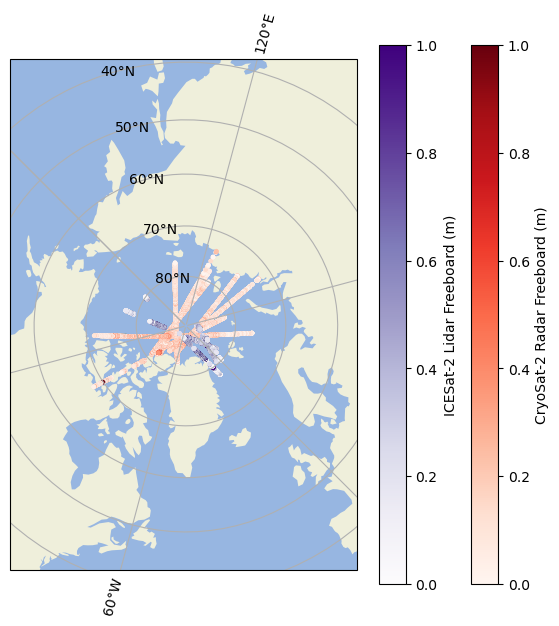

In [11]:
%%time

# NSIDC WGS84 Polar Stereographic 
projection = ccrs.Stereographic(central_latitude=90.,
                                central_longitude=-45.,
                                true_scale_latitude=70.)
extent = [-3850000.000, 3750000., -5350000., 5850000.000]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=projection)
ax.set_extent(extent, projection)
# ax.coastlines()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

ax.gridlines(draw_labels=True)

vmin = 0.
vmax = 1.

# Plot CryoSat-2 freeboards
for fp in downloaded_files:
    ds = xr.open_dataset(fp)
    cs2= plt.scatter(ds.lon_poca_20_ku, ds.lat_poca_20_ku, 5,
                    c=ds.radar_freeboard_20_ku, cmap="Reds",
                     vmin=vmin, vmax=vmax,
                    transform=ccrs.PlateCarree())

# Plot ICESat-2 freeboards
for fp in icesat2_files:
    ds = xr.open_dataset(fp, group='gt2r/freeboard_segment')
    is2 = plt.scatter(ds.longitude, ds.latitude, 5,
                      c=ds.beam_fb_height, cmap="Purples",
                     vmin=vmin, vmax=vmax,
                      transform=ccrs.PlateCarree())
    
fig.colorbar(cs2, label="CryoSat-2 Radar Freeboard (m)")
fig.colorbar(is2, label="ICESat-2 Lidar Freeboard (m)")
    # ds.plot.scatter(x="lon_poca_20_ku", y="lat_poca_20_ku",
    #                 hue="radar_freeboard_20_ku", ax=ax,
    #                 transform=ccrs.PlateCarree())

## Cleanup

Remove CryoSat-2 files from data directory

In [12]:
!rm data/*.nc